In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('final_updated_address.csv')

C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area'>

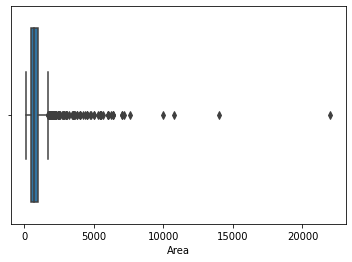

In [4]:
sns.boxplot(df["Area"])

In [5]:
traindf=df[df['Area']<5000]

C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area'>

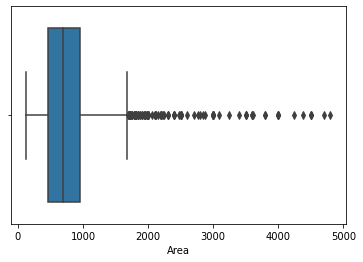

In [6]:
sns.boxplot(traindf["Area"])

In [7]:
df["price"].max()

40.0

C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

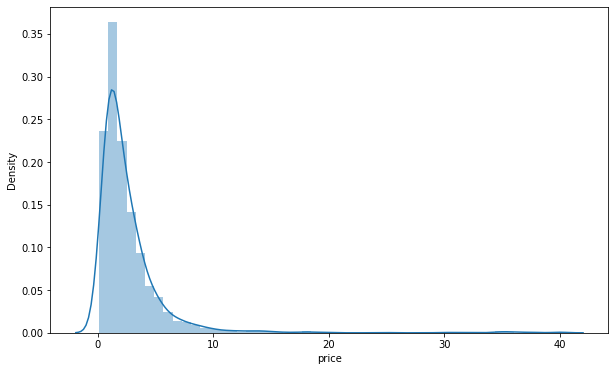

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(df["price"])

C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

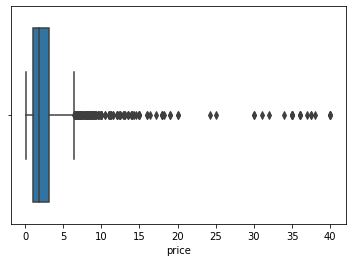

In [9]:
sns.boxplot(df["price"])

In [10]:
traindf=traindf[traindf["price"]<15.0]

C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

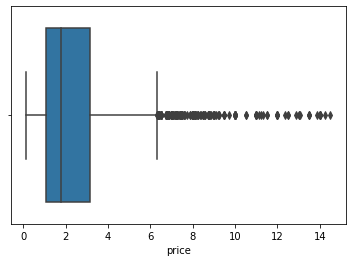

In [11]:
sns.boxplot(traindf["price"])

In [12]:
traindf.drop(columns=['Transaction','Status','Car Parking'],inplace=True)

In [13]:
traindf.head(1)

,Area,Floor,Furnishing,Bathroom,Balcony,price,BHK_type,Address,Type,luxury_type
0,578.0,low level,Unfurnished,1.0,2.0,0.72,1,Mumbai,Apartment,non luxury


In [14]:
import numpy as np


from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.decomposition import PCA

In [15]:
X = traindf.drop(columns=['price'])
y = traindf['price']

In [16]:
y

0        0.72
1        0.45
2        1.50
3        1.30
4        1.17
        ...  
3826     2.75
3827    11.00
3828     5.00
3829    11.50
3831    14.00
Name: price, Length: 3783, dtype: float64

In [17]:
y_transformed = np.log1p(y)

In [18]:
y_transformed

0       0.542324
1       0.371564
2       0.916291
3       0.832909
4       0.774727
          ...   
3826    1.321756
3827    2.484907
3828    1.791759
3829    2.525729
3831    2.708050
Name: price, Length: 3783, dtype: float64

C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

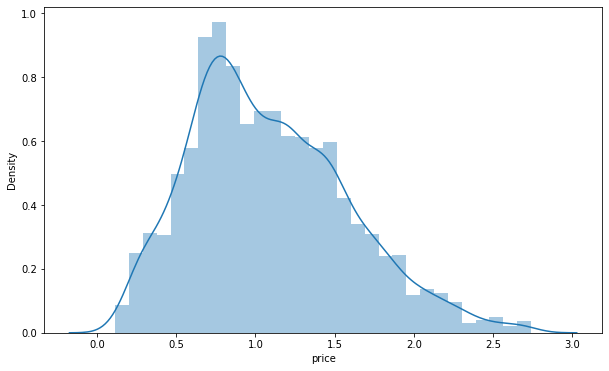

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(y_transformed)

C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Area', ylabel='Density'>

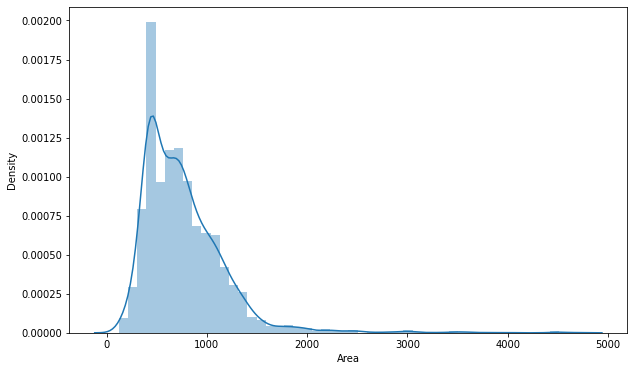

In [20]:
plt.figure(figsize=(10,6))
sns.distplot(X.Area)

In [21]:
X['Area']

0        578.0
1        435.0
2        537.0
3        400.0
4        486.0
         ...  
3826     900.0
3827    1040.0
3828     880.0
3829    1815.0
3831    4500.0
Name: Area, Length: 3783, dtype: float64

In [22]:
X['Area'] = np.log1p(X['Area'])

C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Area', ylabel='Density'>

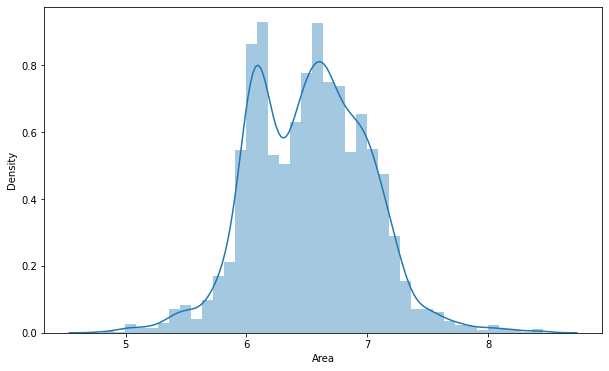

In [23]:
plt.figure(figsize=(10,6))
sns.distplot(X.Area)

# one hot encoding

In [24]:
columns_to_encode = ['Address', 'Type', 'Furnishing', 'luxury_type', 'Floor']

In [25]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Balcony', 'Bathroom', 'Area', 'BHK_type']),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1), columns_to_encode),
      ('cat1',OneHotEncoder(handle_unknown='ignore'),['Furnishing','Address','Type','luxury_type'])
    ],
    remainder='passthrough'
)

In [26]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [27]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

In [28]:
scores.mean()

0.7876184337659239

In [29]:
scores.std()

0.026178918048792986

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)

In [31]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Balcony', 'Bathroom',
                                                   'Area', 'BHK_type']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Address', 'Type',
                                                   'Furnishing', 'luxury_type',
                                                   'Floor']),
                                                 ('cat1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Furnishing', 'Address',
                                                   'Type', 'luxury_type'])])),
                ('regressor', LinearRegression())])

In [32]:
y_pred = pipeline.predict(X_test)

In [33]:
y_pred = np.expm1(y_pred)

In [34]:
mean_absolute_error(np.expm1(y_test),y_pred)

0.5833413683223746

In [35]:
X.shape

(3783, 9)

In [36]:
X.describe()

,Area,Bathroom,Balcony,BHK_type
count,3783.000000,3783.000000,3783.000000,3783.000000
mean,6.522021,2.158869,2.034100,1.944489
std,0.479737,0.771916,1.363244,0.877828
min,4.812184,1.000000,1.000000,1.000000
25%,6.135565,2.000000,1.000000,1.000000
50%,6.532334,2.000000,2.000000,2.000000
75%,6.857514,3.000000,2.000000,3.000000
max,8.455531,7.000000,6.000000,9.000000


In [39]:
def scorer(model_name, model):
    
    output = []
    
    output.append(model_name)
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # K-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')
    
    output.append(scores.mean())
    
    X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)
    
    y_pred = np.expm1(y_pred)
    
    output.append(mean_absolute_error(np.expm1(y_test),y_pred))
    
    return output
    

In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

model_dict = {
    'linear_reg': LinearRegression(),
    'svr': SVR(),
    'ridge': Ridge(),
    'LASSO': Lasso(),
    'decision tree': DecisionTreeRegressor(),
    'random forest': RandomForestRegressor(),
    'extra trees': ExtraTreesRegressor(),
    'gradient boosting': GradientBoostingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'mlp': MLPRegressor(),
    'xgboost': XGBRegressor()
}


In [42]:
model_output = []
for model_name,model in model_dict.items():
    model_output.append(scorer(model_name, model))

In [43]:
model_df = pd.DataFrame(model_output, columns=['name','r2','mae'])

In [44]:
model_df.sort_values(['mae'])

,name,r2,mae
10,xgboost,0.799819,0.525712
9,mlp,0.766599,0.563596
5,random forest,0.760883,0.583141
0,linear_reg,0.787618,0.583341
2,ridge,0.787092,0.583923
6,extra trees,0.760898,0.585350
7,gradient boosting,0.767118,0.596853
4,decision tree,0.568400,0.758977
8,adaboost,0.597165,0.780894
1,svr,0.637388,0.783849


In [118]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {
    'regressor__n_estimators': [50, 100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__max_samples':[0.1, 0.25, 0.5, 1.0],
    'regressor__max_features': ['auto', 'sqrt']
}

In [125]:
param_grid = {
    'regressor__n_estimators': [50, 100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__subsample': [0.5, 0.7, 1.0],
#     'regressor__colsample_bytree': [0.5, 0.7, 1.0],
    'regressor__gamma': [0, 0.1, 0.2, 0.3],
#     'regressor__min_child_weight': [1, 3, 5, 7],
#     'regressor__reg_alpha': [0, 0.01, 0.1, 1.0],
#     'regressor__reg_lambda': [1.0, 1.5, 2.0],
# 
}



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)

In [53]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [54]:
grid_search = GridSearchCV(pipeline , param_grid = param_grid ,cv=5 ,verbose =True)

In [137]:
param_grid = {
    'regressor__n_estimators': [ 100, 200, 300,400],
    'regressor__learning_rate': [0.001,0.01, 0.1, 0.2],
    'regressor__max_depth': [2, 3,4,5, 7],
    'regressor__subsample': [0.5, 0.7, 1.0],
    'regressor__colsample_bytree': [0.5, 0.7, 1.0],
#     'regressor__gamma': [0, 0.1, 0.2, 0.3],
#     'regressor__min_child_weight': [1, 3, 5, 7],
#     'regressor__reg_alpha': [0, 0.01, 0.1, 1.0],
#     'regressor__reg_lambda': [1.0, 1.5, 2.0],
# 
}
7 

7

In [138]:
from xgboost import XGBRegressor

In [139]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Balcony', 'Bathroom', 'Area', 'BHK_type']),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1), columns_to_encode),
      ('cat1',OneHotEncoder(handle_unknown='ignore'),['Furnishing','Address','Type','luxury_type'])
    ],
    remainder='passthrough'
)

In [140]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor',XGBRegressor())
])

In [130]:
grid_search = GridSearchCV(pipeline ,scoring='r2', n_jobs=-1, param_grid = param_grid ,cv=5 ,verbose =4)

In [131]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Balcony',
                                                                          'Bathroom',
                                                                          'Area',
                                                                          'BHK_type']),
                                                                        ('cat',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Address',
                                                                          'Type',
                                                                          'Furnishing',
                                                                          'luxury_type',
                                                                          'Floor']),
                                                                        ('cat1',
                                                                         OneHotEncoder(handle_unknown='...
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None,
                                                     reg_alpha=None,
                                                     reg_lambda=None, ...))]),
             n_jobs=-1,
             param_grid={'regressor__gamma': [0, 0.1, 0.2, 0.3],
                         'regressor__learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'regressor__max_depth': [3, 5, 7, 10],
                         'regressor__n_estimators': [50, 100, 200, 300],
                         'regressor__subsample': [0.5, 0.7, 1.0]},
             scoring='r2', verbose=4)

In [132]:
final_pipe = grid_search.best_estimator_

In [133]:
grid_search.best_params_

{'regressor__gamma': 0,
 'regressor__learning_rate': 0.2,
 'regressor__max_depth': 3,
 'regressor__n_estimators': 200,
 'regressor__subsample': 0.5}

In [134]:

grid_search.best_score_

0.7970342167560446

In [135]:
final_pipe.fit(X,y_transformed)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Balcony', 'Bathroom',
                                                   'Area', 'BHK_type']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Address', 'Type',
                                                   'Furnishing', 'luxury_type',
                                                   'Floor']),
                                                 ('cat1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Furnishing', 'Addr...
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.2, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=3, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=200, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [136]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Balcony', 'Bathroom', 'Area', 'BHK_type']),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1), columns_to_encode),
      ('cat1',OneHotEncoder(handle_unknown='ignore'),['Furnishing','Address','Type','luxury_type'])
    ],
    remainder='passthrough'
)

In [141]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [142]:
search = GridSearchCV(pipeline, param_grid, cv=kfold, scoring='r2', n_jobs=-1, verbose=4)

In [143]:
search.fit(X, y_transformed)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Balcony',
                                                                          'Bathroom',
                                                                          'Area',
                                                                          'BHK_type']),
                                                                        ('cat',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Address',
                                                                          'Type',
                                                                          'Furnishing',
                                                                          'luxury_type',
                                                                          'F...
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None,
                                                     reg_alpha=None,
                                                     reg_lambda=None, ...))]),
             n_jobs=-1,
             param_grid={'regressor__colsample_bytree': [0.5, 0.7, 1.0],
                         'regressor__learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'regressor__max_depth': [2, 3, 4, 5, 7],
                         'regressor__n_estimators': [100, 200, 300, 400],
                         'regressor__subsample': [0.5, 0.7, 1.0]},
             scoring='r2', verbose=4)

In [144]:
final_pipe = search.best_estimator_

In [145]:
search.best_params_

{'regressor__colsample_bytree': 0.5,
 'regressor__learning_rate': 0.1,
 'regressor__max_depth': 4,
 'regressor__n_estimators': 400,
 'regressor__subsample': 0.7}

In [146]:
search.best_score_

0.8175563679655895

In [147]:
final_pipe.fit(X,y_transformed) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Balcony', 'Bathroom',
                                                   'Area', 'BHK_type']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Address', 'Type',
                                                   'Furnishing', 'luxury_type',
                                                   'Floor']),
                                                 ('cat1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Furnishing', 'Addr...
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.1, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=4, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=400, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])